MLP - 행렬곱 구현 실습
===========================

### 휴먼지능정보공학과 201810800 이혜인

## 1. 라이브러리 임포트

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

## 2. MNIST test dataset 가져오기

In [3]:
# "":현재 폴더에 MNIST 있음
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),
                      target_transform=None, download=True)
#test용으로 쓰겠다.

## 3. 대략적인 데이터 형태

mnist_test 길이: 10000
Image data 형태: torch.Size([1, 28, 28])
label: 7


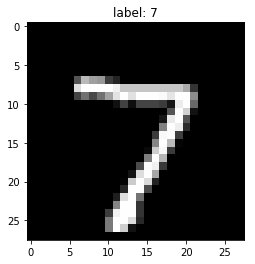

In [5]:
print "mnist_test 길이:", len(mnist_test)

#데이터 하나 형태
Image, label = mnist_test.__getitem__(0) #0번째 데이터
print "Image data 형태:", Image.size()
print "label:", label

#그리기
img = Image.numpy() #image타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

## 4. sigmond, softmax 함수 구현
### $g(z) = \frac{1}{1 + e^{-z}} $

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### $softmax(x)_i = \frac{e^{x_i}} {\Sigma_{j} e^{x_j}} $

In [7]:
def softmax(x):
    e_x=np.exp(x)
    return e_x/np.sum(e_x)

## 5. 모델 선언

In [10]:
#Multi-layered perceptron
# # of units in each layer : 28*28 - 256 - 128 - 10
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        # W^(1): layer1->layer2에 매핑되는 Weight
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32) #W1(256, 28*28)
        self.b1 = np.zeros((n_hidden1,), dtype=np.float32)
        
        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32) #W2(128, 256)
        self.b2 = np.zeros((n_hidden2,), dtype=np.float32)
        
        self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32) #W3(10, 128)
        self.b3 = np.zeros((n_output,), dtype=np.float32) #b3
    
    def __call__(self, x):
        #(1, 28, 28) -> (28*28)
        x = x.reshape(-1) #일렬로 피기
        
        h1 = sigmoid(np.dot(self.W1, x) + self.b1) #W1(256, 28*28), x(28*28), b1(256) -> h1(256)
        h2 = np.dot(self.W2, h1) + self.b2 #W2(128, 256), h1(256), b2(128) -> h2(128)
        out = np.dot(self.W3, h2) + self.b3 #W3(10, 128), h2(128), b3(10) -> out(10)
        
        return softmax(out) #(10)

## 6. 모델 생성

In [11]:
model = MyMLP(28*28, 256, 128, 10)

In [12]:
print model.W1.shape, model.b1.shape
print model.W2.shape, model.b2.shape
print model.W3.shape, model.b3.shape

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


## 7. 미리 학습된 weight 로드

In [13]:
weights = np.load('./nets/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

print model.W1.shape, model.b1.shape
print model.W2.shape, model.b2.shape
print model.W3.shape, model.b3.shape

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


## 8. 테스트

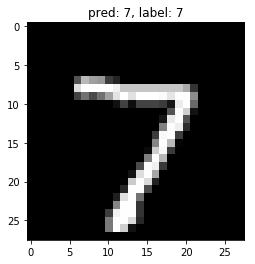

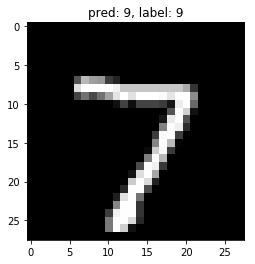

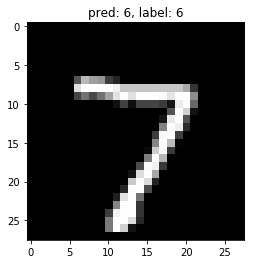

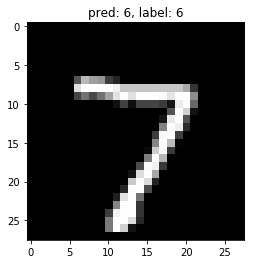

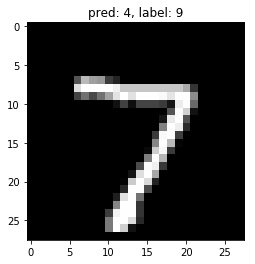

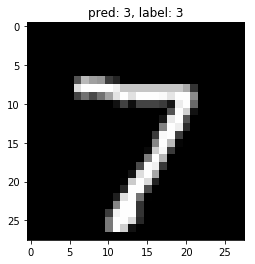

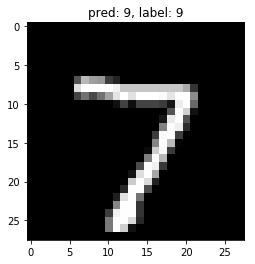

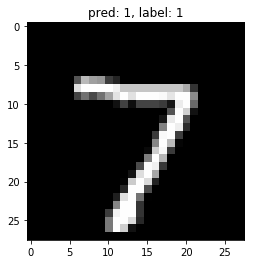

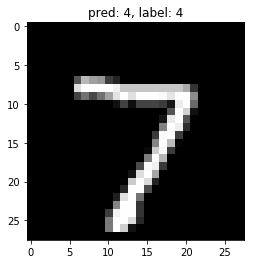

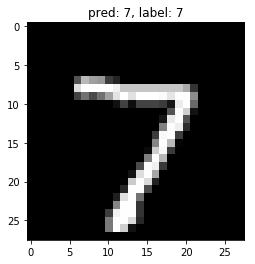

정확도: 91.91


In [14]:
mysum = 0

m = len(mnist_test)
cnt = 0
for i in range(m):
    Image, label = mnist_test.__getitem__(i) #0번째 데이터
    output = model(Image)
    
    if(i%1000==0):
        img - Image.numpy() #image 타입을 numpy로 변환 (1,28,28)
        pred_label = np.argmax(output)
        plt.title("pred: %d, label: %d" %(pred_label, label))
        plt.imshow(img[0], cmap='gray')
        plt.show()
        
    cnt += 1
    mysum += (np.argmax(output) == label)
print "정확도: %.2f" %( (float(mysum) / cnt) * 100.0)